In [17]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import LearningShapelets
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('data/fma_metadata/ts_normal_Fede.csv',index_col=[0])

df

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,1.257842,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,1.679941,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,-1.260999,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,-1.110754,-1.006785,-0.815322,-0.789090,-0.743797,-0.657886,-0.834670,-1.228586,-1.459256,-1.172778,...,-0.597113,-1.080429,1.155361,1.460806,-0.275518,0.091648,0.024073,-0.617410,-1.290487,-1.266442
154307,-0.476355,-0.345470,0.423441,0.826796,0.759305,0.680591,0.419693,0.143946,-0.250479,-0.323848,...,-0.987883,-1.031161,-0.967002,-0.190268,-0.372293,-0.532872,-0.863057,-1.194852,-1.370949,-1.208573
154308,-1.461760,-1.352874,-0.667393,0.180564,-0.043601,-0.641125,-0.769813,-0.651408,1.364934,2.620067,...,1.482417,1.187887,0.431956,-0.469773,-0.895047,-0.669839,-0.516315,-0.603362,-0.740841,-0.866379


In [3]:
tracks = utils.load('data/fma_metadata/tracks.csv')
tracks=tracks[[('track','genre_top')]]
tracks.columns = tracks.columns.droplevel(0)


In [4]:
TS= pd.merge(tracks, df, left_index=True, right_index=True)
TS.info()
TS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 2 to 155066
Columns: 658 entries, genre_top to 656
dtypes: category(1), float64(657)
memory usage: 20.1 MB


,genre_top,0,1,2,3,4,5,6,7,8,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,Hip-Hop,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,Hip-Hop,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,Experimental,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,Rock,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,Rock,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,Hip-Hop,-1.110754,-1.006785,-0.815322,-0.789090,-0.743797,-0.657886,-0.834670,-1.228586,-1.459256,...,-0.597113,-1.080429,1.155361,1.460806,-0.275518,0.091648,0.024073,-0.617410,-1.290487,-1.266442
154307,Hip-Hop,-0.476355,-0.345470,0.423441,0.826796,0.759305,0.680591,0.419693,0.143946,-0.250479,...,-0.987883,-1.031161,-0.967002,-0.190268,-0.372293,-0.532872,-0.863057,-1.194852,-1.370949,-1.208573
154308,Hip-Hop,-1.461760,-1.352874,-0.667393,0.180564,-0.043601,-0.641125,-0.769813,-0.651408,1.364934,...,1.482417,1.187887,0.431956,-0.469773,-0.895047,-0.669839,-0.516315,-0.603362,-0.740841,-0.866379


In [5]:

attributes = [col for col in TS.columns if (col != 'genre_top')] 

X = TS[attributes].values
y = TS['genre_top']

In [6]:
TS['genre_top'].value_counts()

Rock                   999
Experimental           999
Electronic             999
Hip-Hop                997
Spoken                   0
Soul-RnB                 0
Pop                      0
Old-Time / Historic      0
Jazz                     0
International            0
Instrumental             0
Folk                     0
Easy Listening           0
Country                  0
Classical                0
Blues                    0
Name: genre_top, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [8]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.05,
                                                       r=3)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 3994
ts_sz 657
n_classes 4
shapelet_sizes {32: 6, 64: 6, 96: 6}


In [16]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [17]:
param_grid = {'optimizer':["Adam"],
             'max_iter':[150],
             'batch_size':[30],
             'weight_regularizer':[0.01,0]}


dt1 = GridSearchCV(LearningShapelets(n_shapelets_per_size=shapelet_sizes,verbose=1,random_state=0), 
                         param_grid, cv=StratifiedKFold(2),scoring='accuracy')

dt1_fit = dt1.fit(X_train, y_train)
report(dt1_fit.cv_results_, n_top=5)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "
C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 5s 51ms/step - loss: 1.5565 - categorical_accuracy: 0.2529 - categorical_crossentropy: 1.4925
Epoch 2/150
47/47 [==============================] - 2s 53ms/step - loss: 1.4556 - categorical_accuracy: 0.2350 - categorical_crossentropy: 1.3940
Epoch 3/150
47/47 [==============================] - 2s 52ms/step - loss: 1.4382 - categorical_accuracy: 0.2737 - categorical_crossentropy: 1.3787
Epoch 4/150
47/47 [==============================] - 2s 52ms/step - loss: 1.4330 - categorical_accuracy: 0.2737 - categorical_crossentropy: 1.3757
Epoch 5/150
47/47 [==============================] - 3s 57ms/step - loss: 1.4229 - categorical_accuracy: 0.2913 - categorical_crossentropy: 1.3676
Epoch 6/150
47/47 [==============================] - 3s 56ms/step - loss: 1.4140 - categorical_accuracy: 0.3079 - categorical_crossentropy: 1.3608
Epoch 7/150
47/47 [==============================] - 3s 57ms/step - loss: 1.4056 - categorical_accuracy: 0.3317 - cate

47/47 [==============================] - 3s 58ms/step - loss: 1.2447 - categorical_accuracy: 0.4664 - categorical_crossentropy: 1.2122: 1s - loss: 1.2501 - categorical_accuracy: 0.4608 - c
Epoch 103/150
47/47 [==============================] - 3s 56ms/step - loss: 1.2287 - categorical_accuracy: 0.4762 - categorical_crossentropy: 1.1960
Epoch 104/150
47/47 [==============================] - 3s 57ms/step - loss: 1.2309 - categorical_accuracy: 0.4787 - categorical_crossentropy: 1.1983
Epoch 105/150
47/47 [==============================] - 3s 60ms/step - loss: 1.2170 - categorical_accuracy: 0.5033 - categorical_crossentropy: 1.1842
Epoch 106/150
47/47 [==============================] - 3s 63ms/step - loss: 1.2309 - categorical_accuracy: 0.4994 - categorical_crossentropy: 1.1983
Epoch 107/150
47/47 [==============================] - 3s 62ms/step - loss: 1.2268 - categorical_accuracy: 0.4927 - categorical_crossentropy: 1.1940
Epoch 108/150
47/47 [==============================] - 3s 58ms/ste

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 5s 51ms/step - loss: 1.5494 - categorical_accuracy: 0.2454 - categorical_crossentropy: 1.4851
Epoch 2/150
47/47 [==============================] - 3s 54ms/step - loss: 1.4509 - categorical_accuracy: 0.2606 - categorical_crossentropy: 1.3892
Epoch 3/150
47/47 [==============================] - 3s 55ms/step - loss: 1.4431 - categorical_accuracy: 0.2592 - categorical_crossentropy: 1.3839
Epoch 4/150
47/47 [==============================] - 3s 58ms/step - loss: 1.4295 - categorical_accuracy: 0.2514 - categorical_crossentropy: 1.3730
Epoch 5/150
47/47 [==============================] - 3s 55ms/step - loss: 1.4232 - categorical_accuracy: 0.2746 - categorical_crossentropy: 1.3692
Epoch 6/150
47/47 [==============================] - 3s 54ms/step - loss: 1.4114 - categorical_accuracy: 0.3004 - categorical_crossentropy: 1.3597
Epoch 7/150
47/47 [==============================] - 3s 54ms/step - loss: 1.4085 - categorical_accuracy: 0.3000 - cate

47/47 [==============================] - 3s 63ms/step - loss: 1.2118 - categorical_accuracy: 0.5060 - categorical_crossentropy: 1.1752: 1s - loss: 1.2109 - categorical_accuracy: 0.5078 - categ
Epoch 102/150
47/47 [==============================] - 3s 62ms/step - loss: 1.2132 - categorical_accuracy: 0.5076 - categorical_crossentropy: 1.1765: 1s - loss: 1.2165 - categorical_accuracy: 0.5129 - categorical_cros
Epoch 103/150
47/47 [==============================] - 3s 61ms/step - loss: 1.1959 - categorical_accuracy: 0.5162 - categorical_crossentropy: 1.1592
Epoch 104/150
47/47 [==============================] - 3s 67ms/step - loss: 1.2215 - categorical_accuracy: 0.4902 - categorical_crossentropy: 1.1847
Epoch 105/150
47/47 [==============================] - 3s 66ms/step - loss: 1.1836 - categorical_accuracy: 0.5184 - categorical_crossentropy: 1.1467
Epoch 106/150
47/47 [==============================] - 3s 60ms/step - loss: 1.1979 - categorical_accuracy: 0.5049 - categorical_crossentropy: 

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 4s 48ms/step - loss: 1.4926 - categorical_accuracy: 0.2528 - categorical_crossentropy: 1.4926TA: 1s - loss: 1.5185 - categorical_accuracy: 0.2642 - catego
Epoch 2/150
47/47 [==============================] - 2s 48ms/step - loss: 1.3943 - categorical_accuracy: 0.2328 - categorical_crossentropy: 1.3943
Epoch 3/150
47/47 [==============================] - 2s 47ms/step - loss: 1.3789 - categorical_accuracy: 0.2738 - categorical_crossentropy: 1.3789
Epoch 4/150
47/47 [==============================] - 2s 47ms/step - loss: 1.3755 - categorical_accuracy: 0.2762 - categorical_crossentropy: 1.3755
Epoch 5/150
47/47 [==============================] - 2s 48ms/step - loss: 1.3673 - categorical_accuracy: 0.2893 - categorical_crossentropy: 1.3673
Epoch 6/150
47/47 [==============================] - 2s 51ms/step - loss: 1.3597 - categorical_accuracy: 0.3102 - categorical_crossentropy: 1.3597
Epoch 7/150
47/47 [==============================] - 2s 5

47/47 [==============================] - 2s 52ms/step - loss: 1.1845 - categorical_accuracy: 0.4924 - categorical_crossentropy: 1.1845
Epoch 56/150
47/47 [==============================] - 2s 53ms/step - loss: 1.1987 - categorical_accuracy: 0.4894 - categorical_crossentropy: 1.1987
Epoch 57/150
47/47 [==============================] - 3s 55ms/step - loss: 1.2123 - categorical_accuracy: 0.4685 - categorical_crossentropy: 1.2123
Epoch 58/150
47/47 [==============================] - 3s 54ms/step - loss: 1.2116 - categorical_accuracy: 0.4651 - categorical_crossentropy: 1.2116
Epoch 59/150
47/47 [==============================] - 3s 55ms/step - loss: 1.1964 - categorical_accuracy: 0.4958 - categorical_crossentropy: 1.1964
Epoch 60/150
47/47 [==============================] - 2s 51ms/step - loss: 1.1940 - categorical_accuracy: 0.4787 - categorical_crossentropy: 1.1940
Epoch 61/150
47/47 [==============================] - 2s 52ms/step - loss: 1.2139 - categorical_accuracy: 0.4788 - categorica

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 5s 52ms/step - loss: 1.4851 - categorical_accuracy: 0.2451 - categorical_crossentropy: 1.4851
Epoch 2/150
47/47 [==============================] - 2s 53ms/step - loss: 1.3895 - categorical_accuracy: 0.2685 - categorical_crossentropy: 1.3895
Epoch 3/150
47/47 [==============================] - 3s 55ms/step - loss: 1.3844 - categorical_accuracy: 0.2577 - categorical_crossentropy: 1.3844: 2s - loss: 1.4026 - categorical_accuracy: 0.2237
Epoch 4/150
47/47 [==============================] - 2s 52ms/step - loss: 1.3734 - categorical_accuracy: 0.2546 - categorical_crossentropy: 1.3734
Epoch 5/150
47/47 [==============================] - 2s 53ms/step - loss: 1.3693 - categorical_accuracy: 0.2752 - categorical_crossentropy: 1.3693
Epoch 6/150
47/47 [==============================] - 3s 56ms/step - loss: 1.3592 - categorical_accuracy: 0.3036 - categorical_crossentropy: 1.3592
Epoch 7/150
47/47 [==============================] - 3s 56ms/step - 

47/47 [==============================] - 2s 53ms/step - loss: 1.0891 - categorical_accuracy: 0.5597 - categorical_crossentropy: 1.0891
Epoch 106/150
47/47 [==============================] - 2s 53ms/step - loss: 1.1005 - categorical_accuracy: 0.5540 - categorical_crossentropy: 1.1005
Epoch 107/150
47/47 [==============================] - 3s 56ms/step - loss: 1.1112 - categorical_accuracy: 0.5547 - categorical_crossentropy: 1.1112: 1s - loss: 1.0786 - categorical_accuracy: 0.545
Epoch 108/150
47/47 [==============================] - 3s 59ms/step - loss: 1.1212 - categorical_accuracy: 0.5330 - categorical_crossentropy: 1.1212
Epoch 109/150
47/47 [==============================] - 3s 56ms/step - loss: 1.1041 - categorical_accuracy: 0.5492 - categorical_crossentropy: 1.1041: 0s - loss: 1.0995 - categorical_accuracy: 0.5542 - categorical_cross
Epoch 110/150
47/47 [==============================] - 3s 54ms/step - loss: 1.0820 - categorical_accuracy: 0.5703 - categorical_crossentropy: 1.0820
E

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
94/94 [==============================] - 7s 49ms/step - loss: 1.5277 - categorical_accuracy: 0.2289 - categorical_crossentropy: 1.4642
Epoch 2/150
94/94 [==============================] - 5s 49ms/step - loss: 1.4448 - categorical_accuracy: 0.2714 - categorical_crossentropy: 1.3865
Epoch 3/150
94/94 [==============================] - 5s 49ms/step - loss: 1.4266 - categorical_accuracy: 0.2754 - categorical_crossentropy: 1.3732
Epoch 4/150
94/94 [==============================] - 5s 51ms/step - loss: 1.4135 - categorical_accuracy: 0.3030 - categorical_crossentropy: 1.3645
Epoch 5/150
94/94 [==============================] - 5s 49ms/step - loss: 1.4010 - categorical_accuracy: 0.3171 - categorical_crossentropy: 1.3558
Epoch 6/150
94/94 [==============================] - 5s 50ms/step - loss: 1.3938 - categorical_accuracy: 0.3494 - categorical_crossentropy: 1.3520
Epoch 7/150
94/94 [==============================] - 5s 52ms/step - loss: 1.3790 - categorical_accuracy: 0.3589 - cate

94/94 [==============================] - 6s 63ms/step - loss: 1.2104 - categorical_accuracy: 0.5102 - categorical_crossentropy: 1.1784
Epoch 99/150
94/94 [==============================] - 6s 62ms/step - loss: 1.2091 - categorical_accuracy: 0.5109 - categorical_crossentropy: 1.1771
Epoch 100/150
94/94 [==============================] - 6s 65ms/step - loss: 1.2038 - categorical_accuracy: 0.5180 - categorical_crossentropy: 1.1716
Epoch 101/150
94/94 [==============================] - 6s 62ms/step - loss: 1.2167 - categorical_accuracy: 0.5065 - categorical_crossentropy: 1.1843
Epoch 102/150
94/94 [==============================] - 6s 62ms/step - loss: 1.2104 - categorical_accuracy: 0.4909 - categorical_crossentropy: 1.1780: 4s - loss: 1.21
Epoch 103/150
94/94 [==============================] - 6s 65ms/step - loss: 1.2083 - categorical_accuracy: 0.5051 - categorical_crossentropy: 1.1759
Epoch 104/150
94/94 [==============================] - 6s 60ms/step - loss: 1.2038 - categorical_accurac

In [9]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                        optimizer="Adam",
                        weight_regularizer=0.01,
                        max_iter=150,
                        batch_size=30,
                        verbose=1,
                        random_state=0)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [10]:
shp_clf.fit(X_train, y_train)

Epoch 1/150
94/94 [==============================] - 5s 29ms/step - loss: 1.5926 - categorical_accuracy: 0.2663 - categorical_crossentropy: 1.5276
Epoch 2/150
94/94 [==============================] - 3s 32ms/step - loss: 1.4341 - categorical_accuracy: 0.2927 - categorical_crossentropy: 1.3743
Epoch 3/150
94/94 [==============================] - 3s 31ms/step - loss: 1.4177 - categorical_accuracy: 0.3014 - categorical_crossentropy: 1.3619
Epoch 4/150
94/94 [==============================] - 3s 29ms/step - loss: 1.4063 - categorical_accuracy: 0.3111 - categorical_crossentropy: 1.3545
Epoch 5/150
94/94 [==============================] - 3s 29ms/step - loss: 1.3937 - categorical_accuracy: 0.3207 - categorical_crossentropy: 1.3456
Epoch 6/150
94/94 [==============================] - 3s 29ms/step - loss: 1.3925 - categorical_accuracy: 0.3523 - categorical_crossentropy: 1.3477
Epoch 7/150
94/94 [==============================] - 3s 30ms/step - loss: 1.3811 - categorical_accuracy: 0.3646 - cate

94/94 [==============================] - 3s 37ms/step - loss: 1.2243 - categorical_accuracy: 0.4974 - categorical_crossentropy: 1.1937
Epoch 57/150
94/94 [==============================] - 3s 32ms/step - loss: 1.2317 - categorical_accuracy: 0.4951 - categorical_crossentropy: 1.2010
Epoch 58/150
94/94 [==============================] - 4s 38ms/step - loss: 1.2411 - categorical_accuracy: 0.4709 - categorical_crossentropy: 1.2104: 0s - loss: 1.2417 - categorical_accuracy: 0.4693 - categorical_crossent
Epoch 59/150
94/94 [==============================] - 4s 39ms/step - loss: 1.2385 - categorical_accuracy: 0.4787 - categorical_crossentropy: 1.2080
Epoch 60/150
94/94 [==============================] - 4s 39ms/step - loss: 1.2283 - categorical_accuracy: 0.4946 - categorical_crossentropy: 1.1974
Epoch 61/150
94/94 [==============================] - 3s 36ms/step - loss: 1.2370 - categorical_accuracy: 0.4881 - categorical_crossentropy: 1.2063
Epoch 62/150
94/94 [==============================] 

94/94 [==============================] - 3s 34ms/step - loss: 1.2037 - categorical_accuracy: 0.5126 - categorical_crossentropy: 1.1705
Epoch 110/150
94/94 [==============================] - 3s 34ms/step - loss: 1.2029 - categorical_accuracy: 0.5171 - categorical_crossentropy: 1.1698
Epoch 111/150
94/94 [==============================] - 3s 36ms/step - loss: 1.2213 - categorical_accuracy: 0.4900 - categorical_crossentropy: 1.1883
Epoch 112/150
94/94 [==============================] - 4s 39ms/step - loss: 1.2013 - categorical_accuracy: 0.5113 - categorical_crossentropy: 1.1681
Epoch 113/150
94/94 [==============================] - 3s 36ms/step - loss: 1.1915 - categorical_accuracy: 0.5220 - categorical_crossentropy: 1.1582
Epoch 114/150
94/94 [==============================] - 3s 35ms/step - loss: 1.2292 - categorical_accuracy: 0.4947 - categorical_crossentropy: 1.1961
Epoch 115/150
94/94 [==============================] - 3s 36ms/step - loss: 1.2071 - categorical_accuracy: 0.5166 - cate

LearningShapelets(batch_size=30, max_iter=150,
                  n_shapelets_per_size={32: 6, 64: 6, 96: 6}, optimizer='Adam',
                  random_state=0, verbose=1, weight_regularizer=0.01)

In [11]:
predicted_locations = shp_clf.locate(X)

134/134 [==============================] - 3s 22ms/step


In [46]:
shp_clf.shapelets_

array([array([[-1.87401533],
       [-1.83711696],
       [-0.38400647],
       [-1.0483551 ],
       [-2.32650709],
       [-1.85698056],
       [-1.46470201],
       [-1.90328598],
       [-1.95763826],
       [-2.32737398],
       [-1.78009546],
       [-1.84289169],
       [-2.05601454],
       [-1.86671436],
       [-1.730003  ],
       [-1.68809235],
       [-1.35660863],
       [-1.44552553],
       [-2.14056635],
       [-2.49868155],
       [-1.96516085],
       [-1.74559748],
       [-2.01825619],
       [-2.62770867],
       [-3.20860147],
       [-3.3307333 ],
       [-2.93454576],
       [-2.36310887],
       [-2.21850157],
       [-1.72240329],
       [-1.93268013],
       [-2.53279948]]),
       array([[ 1.83736813],
       [ 2.43147564],
       [ 2.1225419 ],
       [ 2.59242249],
       [ 2.37076163],
       [ 1.45820868],
       [ 1.40989065],
       [ 1.38730586],
       [ 1.10881317],
       [ 1.93466759],
       [ 1.61705542],
       [ 1.32394695],
       [ 1.08098

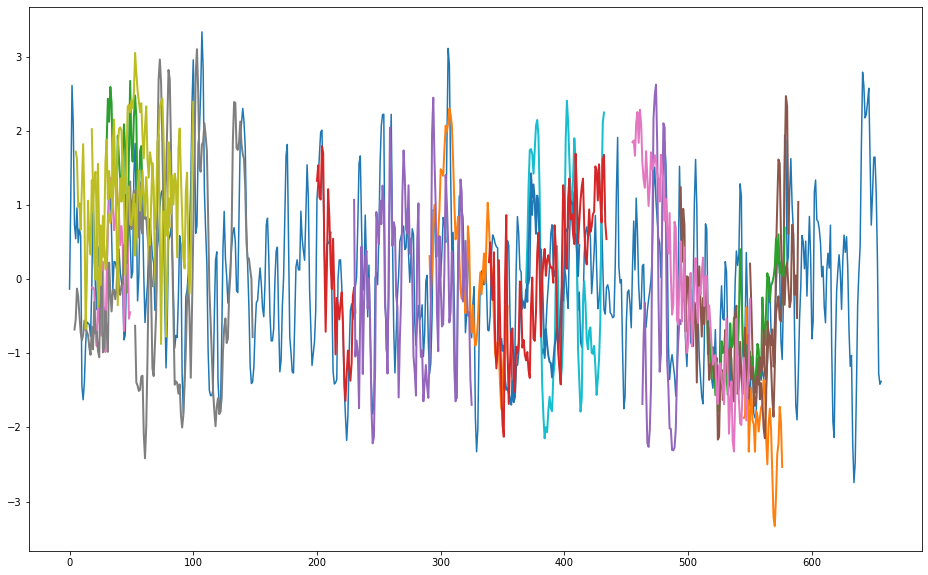

In [45]:
plt.rcParams['figure.figsize'] = (16, 10)
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())


plt.plot(X[ts_id])
for idx_shp, shp in enumerate(shp_clf.shapelets_):


    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

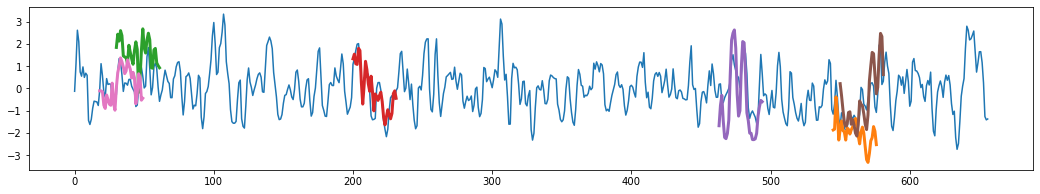

In [68]:
plt.rcParams['figure.figsize'] = (18, 3)
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())


plt.plot(X[ts_id])
i=0
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    if(i==6):
        break
        
    else:
        i=i+1

    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=3)

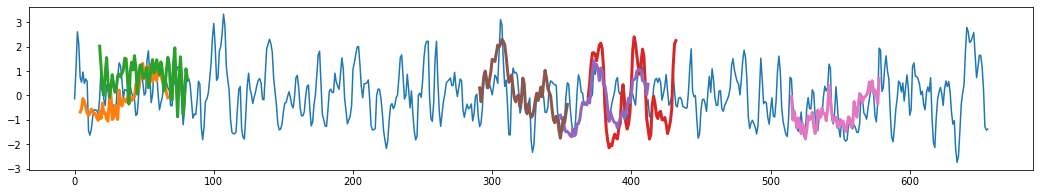

In [69]:
plt.rcParams['figure.figsize'] = (18, 3)
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())


plt.plot(X[ts_id])
i=0
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    if(i<6):
        i=i+1
    
    else:
        if(6<= i <12):
            i=i+1

            t0 = predicted_locations[ts_id, idx_shp]
            plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=3)
        else:
            break

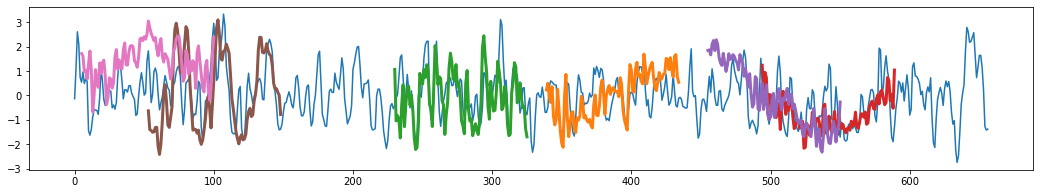

In [71]:
plt.rcParams['figure.figsize'] = (18, 3)
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())


plt.plot(X[ts_id])
i=0
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    if(i<12):
        i=i+1
    
    else:

        t0 = predicted_locations[ts_id, idx_shp]
        plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=3)
        

In [12]:
y_pred_tr = shp_clf.predict(X_train)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average='macro'))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average='macro'))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average='macro'))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)


94/94 [==============================] - 2s 22ms/step
Train Accuracy 0.5216457960644008
Train F1-score 0.5152025879374902
Val Recall 0.5217169636525367
Val Precision 0.5185855851354827
              precision    recall  f1-score   support

  Electronic       0.52      0.38      0.44       699
Experimental       0.47      0.55      0.51       699
     Hip-Hop       0.61      0.72      0.66       698
        Rock       0.48      0.43      0.45       699

    accuracy                           0.52      2795
   macro avg       0.52      0.52      0.52      2795
weighted avg       0.52      0.52      0.52      2795



array([[265, 175, 129, 130],
       [ 85, 387,  99, 128],
       [ 56,  65, 503,  74],
       [106, 194,  96, 303]], dtype=int64)

In [13]:
y_pred = shp_clf.predict(X_test)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

40/40 [==============================] - 1s 23ms/step
Val Accuracy 0.4771
Train F1-score 0.46865170952666046
Val Recall 0.477257525083612
Val Precision 0.47052611841681247
              precision    recall  f1-score   support

  Electronic       0.44      0.31      0.37       300
Experimental       0.42      0.48      0.45       300
     Hip-Hop       0.58      0.71      0.64       299
        Rock       0.44      0.40      0.42       300

    accuracy                           0.48      1199
   macro avg       0.47      0.48      0.47      1199
weighted avg       0.47      0.48      0.47      1199



array([[ 94,  82,  63,  61],
       [ 45, 145,  48,  62],
       [ 31,  26, 212,  30],
       [ 42,  94,  43, 121]], dtype=int64)

In [25]:
X_trainKNN = shp_clf.transform(X_train)
X_testKNN = shp_clf.transform(X_test)

40/40 [==============================] - 1s 20ms/step


In [26]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [27]:
param_grid = {'n_neighbors': range(3,70),
              'weights':['uniform', 'distance'],
              'p' : [1,2]}


dt1 = GridSearchCV(KNeighborsClassifier(), 
                         param_grid, cv=StratifiedKFold(5))

dt1_fit = dt1.fit(X_trainKNN, y_train)
report(dt1_fit.cv_results_, n_top=5)


Model with rank: 1
Mean validation score: 0.525 (std: 0.014)
Parameters: {'n_neighbors': 43, 'p': 1, 'weights': 'uniform'}

Model with rank: 2
Mean validation score: 0.524 (std: 0.011)
Parameters: {'n_neighbors': 31, 'p': 1, 'weights': 'distance'}

Model with rank: 3
Mean validation score: 0.524 (std: 0.011)
Parameters: {'n_neighbors': 49, 'p': 1, 'weights': 'distance'}

Model with rank: 4
Mean validation score: 0.523 (std: 0.017)
Parameters: {'n_neighbors': 42, 'p': 1, 'weights': 'uniform'}

Model with rank: 5
Mean validation score: 0.523 (std: 0.015)
Parameters: {'n_neighbors': 52, 'p': 1, 'weights': 'distance'}



In [31]:
clf = KNeighborsClassifier(n_neighbors=43, weights='uniform',p=1)
clf.fit(X_trainKNN, y_train)

KNeighborsClassifier(n_neighbors=43, p=1)

In [34]:
y_pred_tr = clf.predict(X_trainKNN)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average='macro'))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average='macro'))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average='macro'))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)


Train Accuracy 0.540608228980322
Train F1-score 0.5331035807175195
Val Recall 0.540671077388492
Val Precision 0.5487391432772447
              precision    recall  f1-score   support

  Electronic       0.59      0.33      0.42       699
Experimental       0.51      0.55      0.53       699
     Hip-Hop       0.63      0.72      0.67       698
        Rock       0.46      0.56      0.51       699

    accuracy                           0.54      2795
   macro avg       0.55      0.54      0.53      2795
weighted avg       0.55      0.54      0.53      2795



array([[231, 165, 115, 188],
       [ 65, 386,  82, 166],
       [ 43,  44, 500, 111],
       [ 50, 159,  96, 394]], dtype=int64)

In [35]:
y_pred = clf.predict(X_testKNN)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.4887
Train F1-score 0.4794460089375889
Val Recall 0.4889241917502787
Val Precision 0.49366664728249715
              precision    recall  f1-score   support

  Electronic       0.52      0.28      0.36       300
Experimental       0.44      0.47      0.46       300
     Hip-Hop       0.61      0.71      0.65       299
        Rock       0.40      0.50      0.45       300

    accuracy                           0.49      1199
   macro avg       0.49      0.49      0.48      1199
weighted avg       0.49      0.49      0.48      1199



array([[ 83,  72,  54,  91],
       [ 33, 141,  40,  86],
       [ 18,  23, 212,  46],
       [ 25,  81,  44, 150]], dtype=int64)

In [36]:
X_trainDTREE = shp_clf.transform(X_train)
X_testDTREE = shp_clf.transform(X_test)

40/40 [==============================] - 1s 21ms/step


In [38]:
X_trainDTREE.shape

(2795, 18)

In [37]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split' : range(10,70,10),
              'min_samples_leaf' : range(10,70,10),
              'max_depth': range(1, 20)}


clf1 = GridSearchCV(DecisionTreeClassifier(), 
                         param_grid, cv=StratifiedKFold(5),scoring='accuracy')

clf1 = clf1.fit(X_trainDTREE, y_train)
report(clf1.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.473 (std: 0.012)
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.473 (std: 0.012)
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.473 (std: 0.012)
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 30}

Model with rank: 1
Mean validation score: 0.473 (std: 0.012)
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 40}

Model with rank: 1
Mean validation score: 0.473 (std: 0.012)
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 50}

Model with rank: 1
Mean validation score: 0.473 (std: 0.012)
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 60}



In [39]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0,criterion='entropy',min_samples_leaf=60,min_samples_split=10)
clf.fit(X_trainDTREE, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=60,
                       min_samples_split=10, random_state=0)

In [40]:
y_pred_tr = clf.predict(X_trainDTREE)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average='macro'))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average='macro'))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average='macro'))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)


Train Accuracy 0.5237924865831842
Train F1-score 0.5253854970797993
Val Recall 0.5238295805305164
Val Precision 0.5347284034404636
              precision    recall  f1-score   support

  Electronic       0.48      0.47      0.48       699
Experimental       0.57      0.45      0.50       699
     Hip-Hop       0.66      0.63      0.64       698
        Rock       0.43      0.55      0.48       699

    accuracy                           0.52      2795
   macro avg       0.53      0.52      0.53      2795
weighted avg       0.53      0.52      0.53      2795



array([[329, 101,  77, 192],
       [116, 314,  69, 200],
       [110,  27, 438, 123],
       [128, 105,  83, 383]], dtype=int64)

In [42]:
y_pred = clf.predict(X_testDTREE)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.4562
Train F1-score 0.4545897494974901
Val Recall 0.45630992196209585
Val Precision 0.46210608218929977
              precision    recall  f1-score   support

  Electronic       0.42      0.41      0.42       300
Experimental       0.45      0.33      0.38       300
     Hip-Hop       0.59      0.57      0.58       299
        Rock       0.39      0.51      0.44       300

    accuracy                           0.46      1199
   macro avg       0.46      0.46      0.45      1199
weighted avg       0.46      0.46      0.45      1199



array([[124,  47,  42,  87],
       [ 59,  98,  38, 105],
       [ 58,  20, 171,  50],
       [ 54,  53,  39, 154]], dtype=int64)

In [15]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [14]:
X_trainSVM = shp_clf.transform(X_train)
X_testSVM = shp_clf.transform(X_test)

40/40 [==============================] - 1s 21ms/step


In [19]:
param_grid = {'C': [0.0001,0.001,0.1,1,100,1000,10000],
            'kernel': ['rbf','linear'],
            'gamma': ['scale','auto']
            }


clf1 = RandomizedSearchCV(SVC(), 
                         param_grid, cv=StratifiedKFold(5),scoring='accuracy',random_state=0)

clf1 = clf1.fit(X_trainSVM, y_train)
report(clf1.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.537 (std: 0.017)
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}

Model with rank: 2
Mean validation score: 0.525 (std: 0.011)
Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}

Model with rank: 3
Mean validation score: 0.522 (std: 0.011)
Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 100}

Model with rank: 4
Mean validation score: 0.520 (std: 0.015)
Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 10000}

Model with rank: 5
Mean validation score: 0.519 (std: 0.014)
Parameters: {'kernel': 'linear', 'gamma': 'auto', 'C': 0.1}



In [24]:
clf = SVC(random_state=0,C=1,gamma='auto',kernel='rbf')
clf.fit(X_trainSVM, y_train)

SVC(C=1, gamma='auto', random_state=0)

In [25]:
y_pred_tr = clf.predict(X_trainSVM)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average='macro'))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average='macro'))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average='macro'))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)

Train Accuracy 0.5481216457960644
Train F1-score 0.5443839240540672
Val Recall 0.5481720714405762
Val Precision 0.5534508903862738
              precision    recall  f1-score   support

  Electronic       0.58      0.39      0.46       699
Experimental       0.53      0.53      0.53       699
     Hip-Hop       0.64      0.69      0.66       698
        Rock       0.47      0.59      0.52       699

    accuracy                           0.55      2795
   macro avg       0.55      0.55      0.54      2795
weighted avg       0.55      0.55      0.54      2795



array([[271, 147, 107, 174],
       [ 78, 370,  85, 166],
       [ 54,  43, 481, 120],
       [ 67, 143,  79, 410]], dtype=int64)

In [26]:
y_pred = clf.predict(X_testSVM)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.4887
Train F1-score 0.48025630958157844
Val Recall 0.4889158305462653
Val Precision 0.4853425011992505
              precision    recall  f1-score   support

  Electronic       0.46      0.29      0.35       300
Experimental       0.44      0.45      0.45       300
     Hip-Hop       0.61      0.70      0.65       299
        Rock       0.43      0.52      0.47       300

    accuracy                           0.49      1199
   macro avg       0.49      0.49      0.48      1199
weighted avg       0.49      0.49      0.48      1199



array([[ 86,  76,  54,  84],
       [ 45, 135,  41,  79],
       [ 25,  19, 209,  46],
       [ 31,  76,  37, 156]], dtype=int64)